## Colorado Oil & Gas Drilling Permits
##### Investigating how the number of Drilling permits changed over the past year (June 2016-June 2017)

* Has the new administration had an effect on the permit approval process?
* Has the number of permit requests increased?

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from datetime import timedelta
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
%matplotlib inline

#### Data Import

In [2]:
# Import Colorado Oil & Gas Well permits approved 4/11/2012 - 8/28/2017
# http://cogcc.state.co.us/data.html#/cogis
df_wells = pd.read_csv("data/older_well_permits_clean.csv")

df_wells.sample(5)

,Unnamed: 0,facility_id_API,facility_type,status,facility_name,facility_num,field_name,field_num,county,coord,operator_name,operator_num
382,382,05-009-06678,WELL,2017-08-20,HEFLEY,1,WILDCAT,99999.0,BACA,009CSE 9 34S 41W 6,CRAWLEY PETROLEUM CORPORATION,10599
458,458,05-045-20114,WELL,2013-11-21,LONG RIDGE,14B N15 595,GRAND VALLEY,31290.0,GARFIELD,045SESW 15 5S 95W 6,BERRY PETROLEUM COMPANY LLC,10091
2847,2847,05-103-12236,WELL,2015-03-27,FEDERAL,RGU 414-36-198,SULPHUR CREEK,80090.0,RIO BLANCO,103NWSW 36 1S 98W 6,TEP ROCKY MOUNTAIN LLC,96850
82,82,05-001-10041,WELL,2017-04-22,PC NORTH 1S-66-2928,7CDH,WATTENBERG,90750.0,ADAMS,001NWSW 29 1S 66W 6,EXTRACTION OIL & GAS INC,10459
4897,4897,05-123-44542,WELL,2017-03-31,State North Platte,11-36-1XRLC,WATTENBERG,90750.0,WELD,123NWNW 36 5N 63W 6,BONANZA CREEK ENERGY OPERATING COMPANY LLC,8960


In [3]:
df_wells.describe()

/home/griggs/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Unnamed: 0,field_num,operator_num
count,6259.000000,6247.000000,6259.000000
mean,3129.000000,75401.506963,39985.729030
std,1806.961999,27077.972283,38241.580625
min,0.000000,1950.000000,5.000000
25%,1564.500000,NaN,10350.000000
50%,3129.000000,NaN,10531.000000
75%,4693.500000,NaN,86610.000000
max,6258.000000,99999.000000,200077.000000


In [6]:
print("Min date of permitted wells: {}".format(df_wells['status'].min()))
print("Max date of permitted wells: {}".format(df_wells['status'].max()))

Min date of permitted wells: 2002-04-11
Max date of permitted wells: 2017-08-28


In [9]:
# Getting listing of Companies with most well permits approved in this time period
df_wells.groupby('operator_name').count()['county'].sort_values(axis=0, ascending=False)

operator_name
TEP ROCKY MOUNTAIN LLC                        502
PDC ENERGY INC                                468
WHITING OIL & GAS CORPORATION                 452
CAERUS PICEANCE LLC                           381
BERRY PETROLEUM COMPANY LLC                   373
EXTRACTION OIL & GAS INC                      330
ENCANA OIL & GAS (USA) INC                    316
GREAT WESTERN OPERATING COMPANY LLC           293
URSA OPERATING COMPANY LLC                    210
BARRETT CORPORATION* BILL                     162
SRC ENERGY INC                                150
BONANZA CREEK ENERGY OPERATING COMPANY LLC    146
ANADARKO E&P ONSHORE LLC                      144
NOBLE ENERGY INC                              135
VANGUARD OPERATING LLC                        129
CAERUS WASHCO LLC                             127
FIFTH CREEK ENERGY OPERATING COMPANY LLC      124
KERR MCGEE OIL & GAS ONSHORE LP               113
LARAMIE ENERGY LLC                            109
CRESTONE PEAK RESOURCES OPERATING LL

In [12]:
# Getting number of wells by County
df_wells.groupby('county').count()['operator_name'].sort_values(axis=0, ascending=False)

county
WELD          3132
GARFIELD      1754
RIO BLANCO     337
ADAMS          270
MESA           120
LA PLATA       107
ARAPAHOE       100
LINCOLN         95
YUMA            47
GUNNISON        44
JACKSON         43
MOFFAT          37
MORGAN          36
WASHINGTON      18
MONTEZUMA       16
CHEYENNE        13
ARCHULETA       12
ROUTT           11
HUERFANO        10
LOGAN            8
PHILLIPS         8
SEDGWICK         6
ELBERT           5
LARIMER          5
LAS ANIMAS       5
KIOWA            4
SAN MIGUEL       3
FREMONT          2
DOLORES          2
CROWLEY          2
BACA             2
JEFFERSON        1
DELTA            1
RIO GRANDE       1
PROWERS          1
PITKIN           1
Name: operator_name, dtype: int64

In [15]:
def line_plot(df, column):
    # Creating line plot
    
    # Setting up display parameters
    mpl.rc('xtick', labelsize=12)
    mpl.rc('ytick', labelsize=12)
    mpl.rcParams.update({'font.size': 15})

    # Plotting Day vs. Average Number of Patients
    x = df.groupby(column).count().index
    y = df.groupby(column).count()['county']

    fig=plt.figure(figsize=(15,7));
    ax=fig.add_subplot(111);
    ax.plot(x, y, color='b', linewidth=1.5);
    plt.xticks(rotation='vertical');

In [19]:
df_wells.groupby('status').count()['county'].index

Index([u'2002-04-11', u'2004-02-02', u'2004-02-24', u'2004-10-05',
       u'2004-10-08', u'2005-05-27', u'2005-07-21', u'2005-11-16',
       u'2006-01-26', u'2006-02-16',
       ...
       u'2017-08-07', u'2017-08-11', u'2017-08-14', u'2017-08-15',
       u'2017-08-18', u'2017-08-20', u'2017-08-23', u'2017-08-24',
       u'2017-08-25', u'2017-08-28'],
      dtype='object', name=u'status', length=929)

ValueError: invalid literal for float(): 2017-08-28

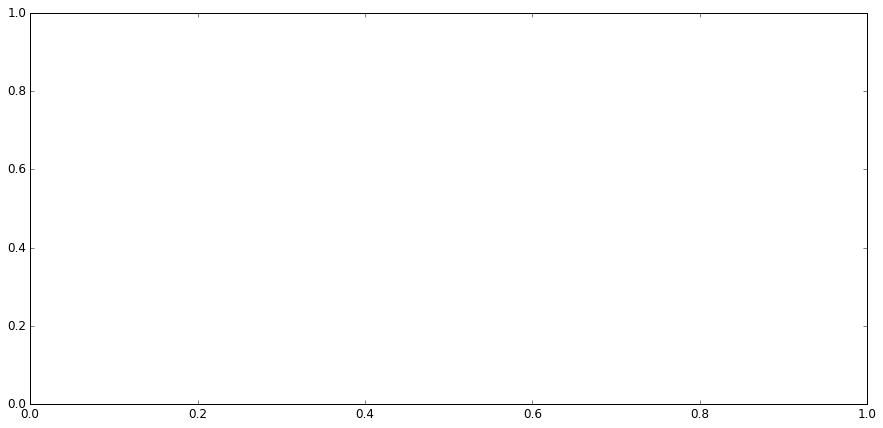

In [16]:
# Plotting the number Number of permits approved per Day in Colorado
line_plot(df_wells, 'status')
plt.title("Number of CO Drilling Permits Approved per Day\n");
plt.xlabel('\nDate');
plt.ylabel('Number of Applications');